# Feature Selection Wrapper and Embedded techniques:

# 1:Wrapper Technique:

In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris 
iris=load_iris()
x=iris.data
y=iris.target
knn=KNeighborsClassifier(n_neighbors=4)

In [3]:
sfs=SFS(knn,
       k_features=2,
       forward=False,#(Backward)
        #forward=True,#(forward)
      floating=False,
       scoring='accuracy',
       cv=0,n_jobs=-1)
feature_names=('sepal length','sepal width','petal length','petal width')
sfs=sfs.fit(x,y,custom_feature_names=feature_names)

In [4]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)",[0.96],0.96,"(sepal length, sepal width, petal length, peta...",NaN,0.0,NaN
3,"(1, 2, 3)",[0.9733333333333334],0.973333,"(sepal width, petal length, petal width)",NaN,0.0,NaN
2,"(2, 3)",[0.9733333333333334],0.973333,"(petal length, petal width)",NaN,0.0,NaN


# Recursive Feature Elimination:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
# loading dataset:

boston_dataset=datasets.load_boston()

#Load the data set into Pandas Dataframe:

boston_pd=pd.DataFrame(boston_dataset.data)
boston_pd_columns=boston_dataset.feature_names
boston_pd_target=np.array(boston_dataset.target)
boston_pd['price']=pd.Series(boston_pd_target)

x=boston_pd.iloc[:,:-1]
y=boston_pd.iloc[:,-1]

#training and testing:

x_train,x_test,y_train,y_test=train_test_split(boston_pd.iloc[:,:-1],boston_pd.iloc[:,-1],test_size=0.20,random_state=0)
print(boston_pd.head())


from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

lin_reg=LinearRegression()

rfe_mod=RFE(lin_reg)
myvalues=rfe_mod.fit(x,y)
myvalues.support_
myvalues.ranking_


print("Num of features: %s"%(myvalues.n_features_))
print("Selected features:%s"%(myvalues.support_))
print("Feature Ranking :%s"%(myvalues.ranking_))

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  price  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  
Num of features: 6
Selected features:[False False False  True  True  True False  True False False  True False
  True]
Feature Ranking :[3 5 4 1 1 1 8 1 2 6 1 7 1]


Here Num of features: 6

All "1" Feature Ranking will consider not to Eliminate

# Embedded methods:

Using models to select features:

In [8]:
from sklearn.linear_model import Lasso
 

lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 

mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("MSE on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

MSE on test set 41.700096799949
   Columns  Coefficient Estimate
0        0             -0.058890
1        1              0.053177
2        2             -0.000000
3        3              0.000000
4        4             -0.000000
5        5              0.679550
6        6              0.016841
7        7             -0.648766
8        8              0.198738
9        9             -0.013994
10      10             -0.864220
11      11              0.006603
12      12             -0.731210


Here we can observe the low Coefficient value "3" we can drop that feature.

# Using Random Forest to Select features:

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100,random_state=42)
rf.fit(x_train, y_train)
importances = rf.feature_importances_

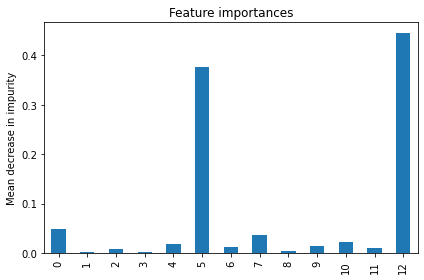

In [10]:
forest_importances = pd.Series(importances, index=x_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Here low Bar lines we can drop the features.